# Не доделал, не успел дописать

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import scipy.stats
import numpy as np
import random
import math
%matplotlib inline

In [2]:
symbols = ['0','1','2','3','4','5','6','7','8','9','a','b','c','d','e','f']
def color_generator() :
    col = '#'
    for i in range(6) :
        col += (symbols[random.randint(0, 15)])
    return col

In [1]:
N = 1000
m = 50
a =  3
sigma = 2.1

In [4]:
binomial_const = 13.8071

Cоздадим наследника класса абсолютно-непрерывных распределений, чтобы сгенерить параметр

In [5]:
class given_distribution(scipy.stats.rv_continuous):
    def _pdf(self, x):
        return binomial_const * x ** 2
given = given_distribution(a= 0.32, b= 0.63, name='given')

Генерим недостающие параметры для нашей выборки

In [8]:
binomial_p = given.rvs(size = 1)[0]
binomial_p

0.43133554654697553

In [27]:
norm_a = scipy.stats.expon.rvs(2.9 ,size = 1)[0]
norm_a

2.9631991715186121

In [31]:
norm_sigma = scipy.stats.expon.rvs(6.6 ,size = 1)[0]
norm_sigma

6.7311989161393049

In [32]:
binomial = scipy.stats.binom.rvs(50, binomial_p, size = N)
normal_a = scipy.stats.norm.rvs(size = N , loc = norm_a, scale = 2.1)
normal_sigma = scipy.stats.norm.rvs(size = N , loc = 3, scale = norm_sigma)

Данные оценки являются эффективными, это можно проверить, подставив их в неравенсто Рао-Крамера

The best of the best

$\frac{\overline X}{m}$ for binom

$\overline X$ for norm without a

$\frac{\sum{(x_{i} - a)} ^ 2}{n} $ for normal

Cделаем предпосчет суммы для эффективной оценки $\sigma^2$

In [35]:
sums = []
current_sum = 0
for i in xrange(N) :
    current_sum += (normal_sigma[i] - float(a)) ** 2
    sums.append(current_sum)
current_sum

46367.373125274004

In [44]:
%%time
binomial_effective_eval = [np.mean(binomial[:(i + 1)]) / float(m) for i in xrange(N)]
norm_a_effective_eval = [np.mean(normal_a[:(i + 1)]) for i in xrange(N)]
norm_sigma_effective_eval = [sums[i] / float(i + 1) for i in xrange(N)]

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.05 µs


In [46]:
bootstrap_number = 500

Сгененрируем бутстрепные выборки

In [47]:
%time
bootstrap_selections_bin = []
bootstrap_selections_norm_a = []
bootstrap_selections_norm_b = []

for j in xrange(N) :
    bootstrap_selections_bin.append([scipy.stats.binom.rvs(m, binomial_effective_eval[j], size = j + 1) for iterat in xrange(bootstrap_number)])
    bootstrap_selections_norm_a.append([scipy.stats.norm.rvs(size = j + 1, loc = norm_a_effective_eval[j], scale = 2.1) for iterat in xrange(bootstrap_number)])
    bootstrap_selections_norm_b.append([scipy.stats.norm.rvs(size = j + 1, loc = 3, scale = norm_sigma_effective_eval[j]) for iterat in xrange(bootstrap_number)])

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs


Найдем оценки для бутсрепных выборок

In [48]:
%time
bootstrap_bin_eval = []
for j in xrange(N) :
    bootstrap_bin_eval.append(map(lambda selec: np.mean(selec) / float(len(selec)), bootstrap_selections_bin[j]))
bootstrap_norm_a_eval = []
for j in xrange(N) :
    bootstrap_norm_a_eval.append(map(lambda selec: np.mean(selec), bootstrap_selections_norm_a[j]))


CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 23.8 µs


In [50]:
np.shape(bootstrap_selections_norm_b)

(1000, 500)

In [52]:
%%time
bootstrap_norm_b_eval = []
for j in xrange(N) :
    boots_evals = []
    for i in xrange(bootstrap_number) :
        selec = bootstrap_selections_norm_b[j][i]
        summa = sum(map(lambda elem : (elem - a) ** 2, selec)) / float(j + 1)
        boots_evals.append(summa)
    bootstrap_norm_b_eval.append(boots_evals)


CPU times: user 2min 39s, sys: 6.71 s, total: 2min 46s
Wall time: 2min 52s


Найдем бутстрепную оценку дисперсии

In [54]:
bin_boots_disp = []
for j in xrange(N) :
    bin_boots_disp.append(scipy.stats.moment(bootstrap_bin_eval[j], 2))

In [55]:
norm_a_disp = []
for j in xrange(N) :
    norm_a_disp.append(scipy.stats.moment(bootstrap_norm_a_eval[j], 2))

In [56]:
norm_b_disp = []
for j in xrange(N) :
    norm_b_disp.append(scipy.stats.moment(bootstrap_norm_b_eval[j], 2))

## Построим графики, полученных нами результатов

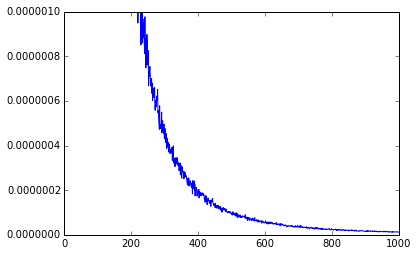

In [77]:
plt.plot(xrange(N), bin_boots_disp)
plt.ylim(0, 0.000001)
plt.show()

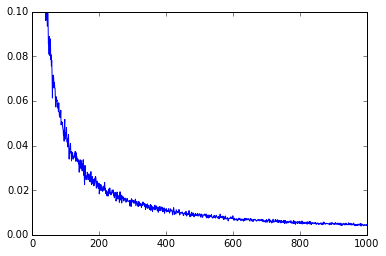

In [82]:
plt.plot(xrange(N), norm_a_disp)
plt.ylim(0, 0.1)
plt.show()

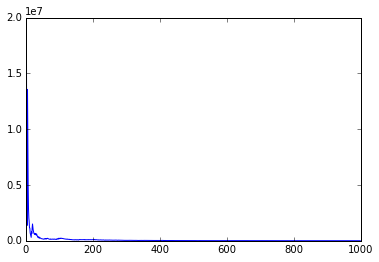

In [90]:
plt.plot(xrange(N), norm_b_disp)
plt.show()